In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn .preprocessing import StandardScaler, scale 
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data=pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


C:\Users\Anushka\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Anushka\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Anushka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


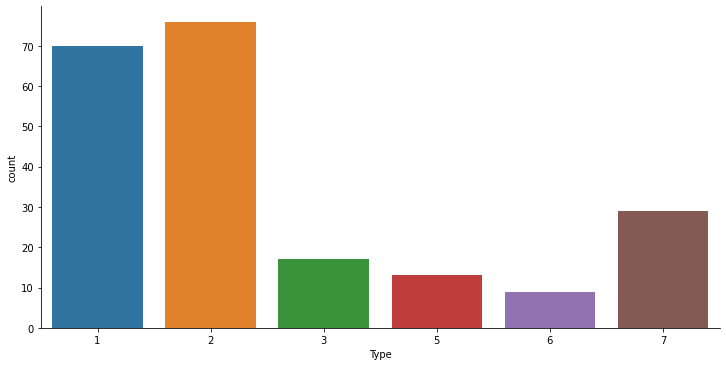

In [24]:
sns.factorplot('Type', data=data, kind="count",size = 5,aspect = 2)

In [9]:
X = data.drop('Type', axis = 1)
y = data['Type']

In [14]:
X_scaled = scale(X)

In [15]:
#determine best K
kfold = KFold(10)
accuracy = []
k = range(1,41)

for i in k:
    model = KNeighborsClassifier(n_neighbors = i)
    result = cross_val_score(model, X_scaled, y, cv = kfold)
    accuracy.append([np.mean(result), i])
accuracy

[[0.5586580086580086, 1],
 [0.5844155844155845, 2],
 [0.5619047619047619, 3],
 [0.551948051948052, 4],
 [0.5523809523809524, 5],
 [0.4426406926406926, 6],
 [0.4149350649350649, 7],
 [0.4238095238095238, 8],
 [0.4383116883116883, 9],
 [0.4283549783549783, 10],
 [0.41948051948051945, 11],
 [0.42900432900432905, 12],
 [0.41948051948051945, 13],
 [0.42878787878787883, 14],
 [0.40108225108225104, 15],
 [0.3963203463203463, 16],
 [0.38246753246753246, 17],
 [0.3917748917748917, 18],
 [0.38246753246753246, 19],
 [0.3686147186147186, 20],
 [0.3779220779220779, 21],
 [0.3547619047619047, 22],
 [0.35454545454545455, 23],
 [0.35043290043290043, 24],
 [0.3363636363636363, 25],
 [0.34610389610389614, 26],
 [0.3041125541125541, 27],
 [0.32251082251082247, 28],
 [0.3041125541125541, 29],
 [0.2811688311688311, 30],
 [0.2577922077922078, 31],
 [0.2534632034632035, 32],
 [0.2582251082251082, 33],
 [0.2487012987012987, 34],
 [0.2443722943722944, 35],
 [0.22575757575757574, 36],
 [0.23051948051948049, 37]

In [17]:

accuracy_df = pd.DataFrame(accuracy, columns = ['Accuracy', 'K'])
accuracy_df

,Accuracy,K
0,0.558658,1
1,0.584416,2
2,0.561905,3
3,0.551948,4
4,0.552381,5
5,0.442641,6
6,0.414935,7
7,0.423810,8
8,0.438312,9
9,0.428355,10


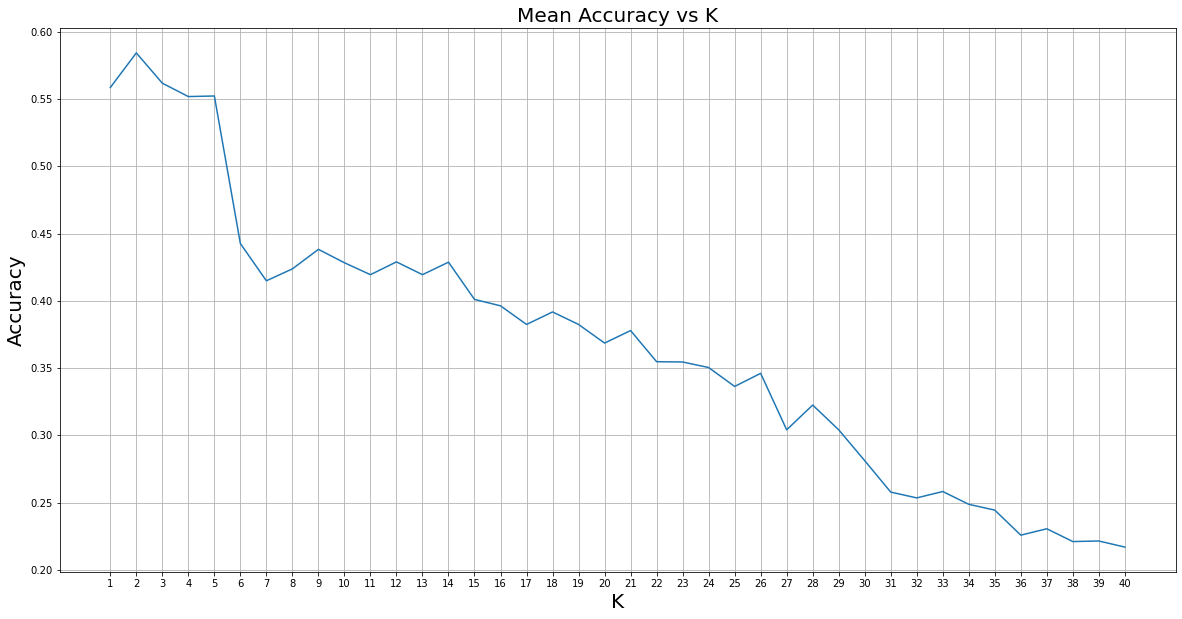

In [18]:

plt.figure(figsize = (20,10))
plt.plot(k, accuracy_df['Accuracy'])
plt.xlabel('K', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(k)
plt.title('Mean Accuracy vs K', fontsize = 20)
plt.grid()

In [19]:
max_accuracy = accuracy_df[accuracy_df['Accuracy'] == accuracy_df['Accuracy'].max()]
K_best = int(max_accuracy['K'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [21]:
model = KNeighborsClassifier(n_neighbors = K_best)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:

predictions = model.predict(X_test)
np.mean(predictions == y_test)

0.6744186046511628

In [23]:
confusion_matrix(y_test, predictions)

array([[9, 2, 0, 0, 0, 0],
       [5, 9, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 1, 7]], dtype=int64)

#### Animal classification(zoo dataset)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [27]:
zoo=pd.read_csv('zoo.csv')

In [28]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


C:\Users\Anushka\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Anushka\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Anushka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


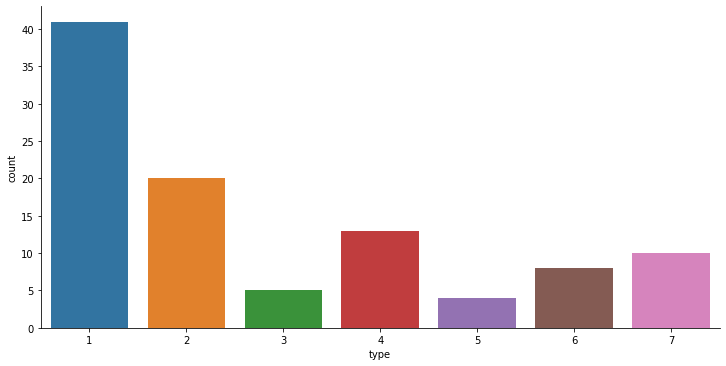

In [30]:
sns.factorplot('type', data=zoo, kind="count",size = 5,aspect = 2)

In [31]:
X = zoo.drop(columns = ['animal name', 'type'])
y = zoo['type']

In [32]:
#determine best K
k = range(1,41)
kfold = KFold(10)
accuracy = []
for i in k:
    model = KNeighborsClassifier(i)
    result = cross_val_score(model, X, y, cv = kfold)
    accuracy.append(np.mean(result))

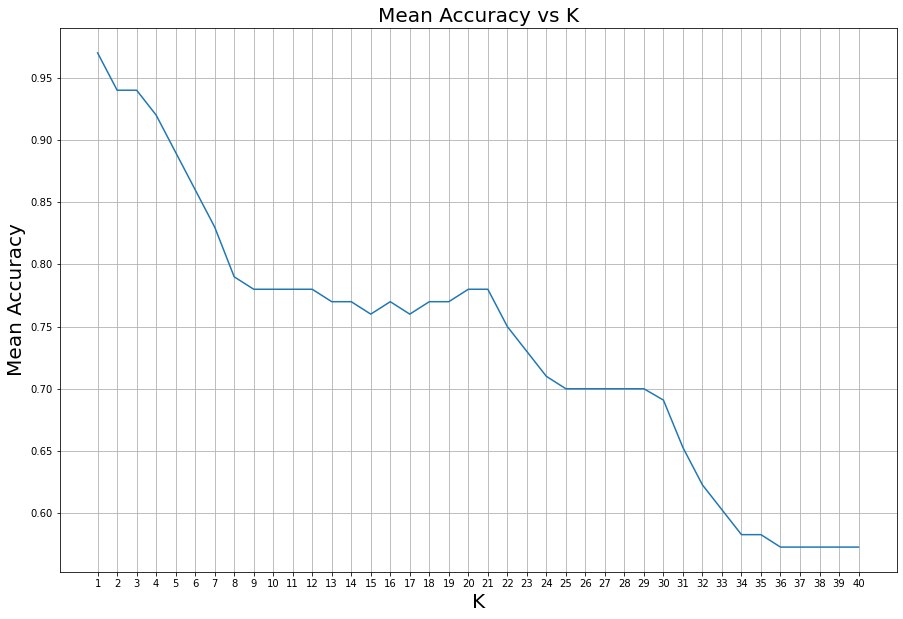

In [38]:
plt.figure(figsize = (15,10))
plt.plot(k, accuracy)
plt.xticks(k)
plt.xlabel('K', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Mean Accuracy vs K', fontsize = 20)
plt.grid()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [35]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [36]:
np.mean(predictions == y_test)

1.0

In [37]:
cf = confusion_matrix(y_test, predictions)
cf

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)